In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [18]:
data = pd.read_csv('/content/House_Pricing.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [19]:
data.shape

(21613, 21)

In [20]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [22]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [23]:
data.drop(columns=['No of Times Visited'],inplace=True)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [24]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [25]:
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       f

In [26]:
data['Sale Price'].fillna(data['Sale Price'].mode()[0],inplace=True)
data['No of Bathrooms'].fillna(data['No of Bathrooms'].mode()[0],inplace=True)
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mode()[0],inplace=True)
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mode()[0],inplace=True)
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mode()[0],inplace=True)
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)
data['Latitude'].fillna(data['Latitude'].mode()[0],inplace=True)
data['Longitude'].fillna(data['Longitude'].mode()[0],inplace=True)
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mode()[0],inplace=True)
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [27]:
data.drop(['ID'],axis=1,inplace=True)
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


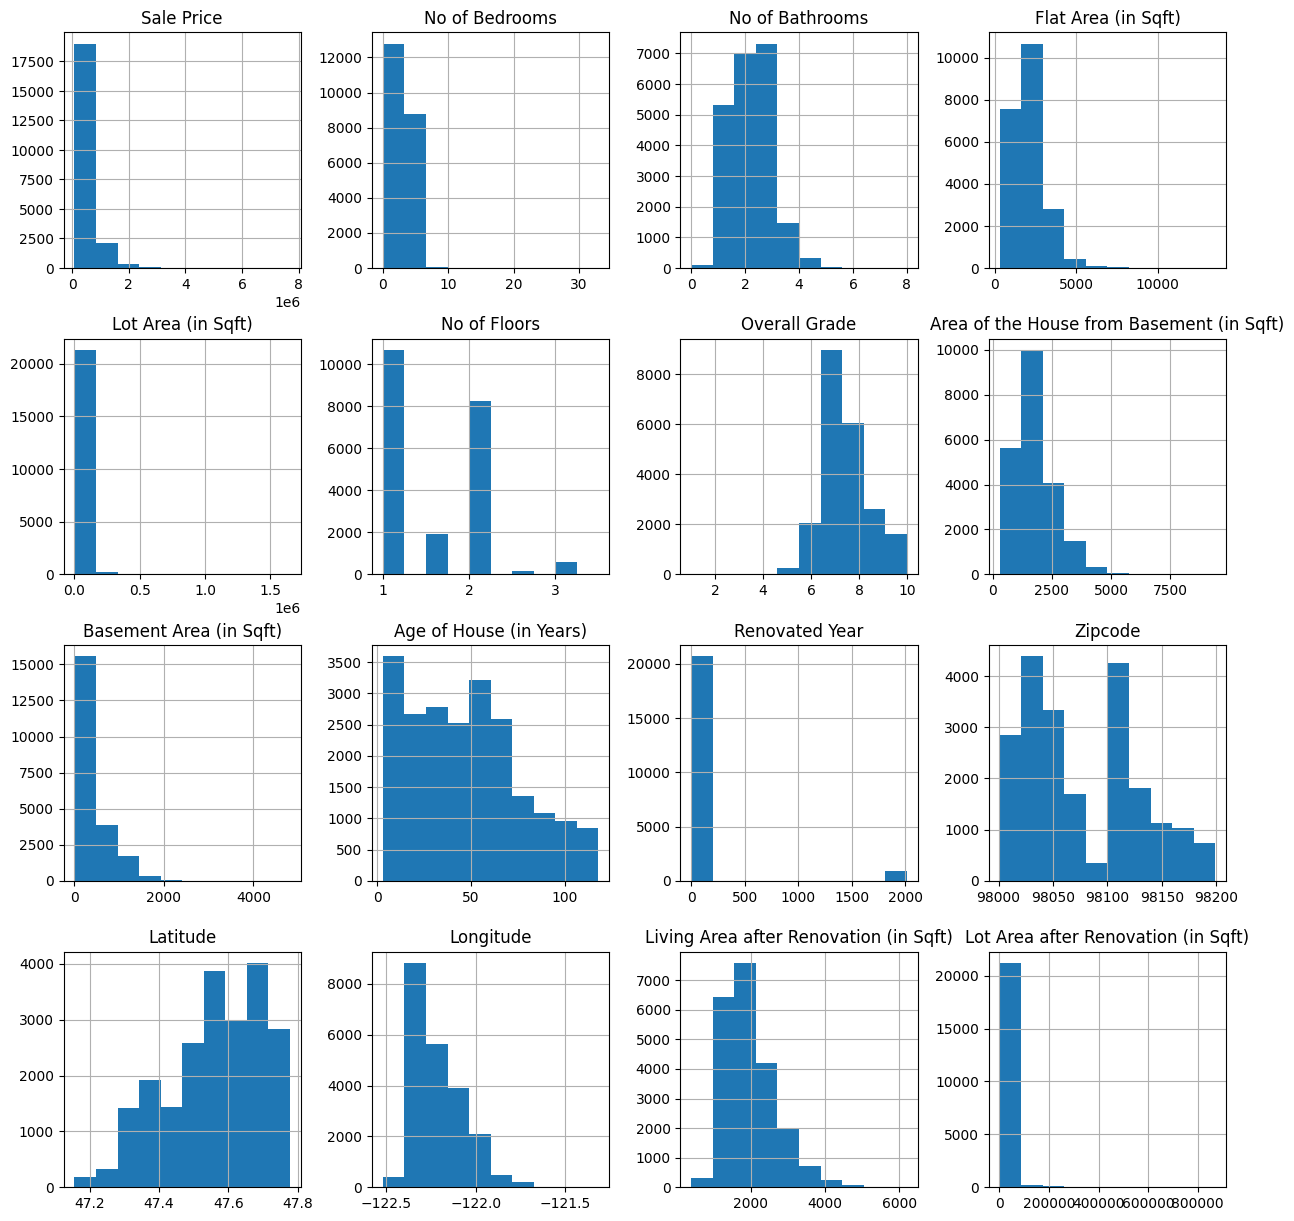

In [28]:
data.hist(figsize=(15,15))
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21613 non-null  object 
 1   Sale Price                                 21613 non-null  float64
 2   No of Bedrooms                             21613 non-null  int64  
 3   No of Bathrooms                            21613 non-null  float64
 4   Flat Area (in Sqft)                        21613 non-null  float64
 5   Lot Area (in Sqft)                         21613 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Waterfront View                            21613 non-null  object 
 8   Condition of the House                     21613 non-null  object 
 9   Overall Grade                              21613 non-null  int64  
 10  Area of the House from

In [30]:
data['Date House was Sold']=pd.to_datetime(data['Date House was Sold'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date House was Sold                        21613 non-null  datetime64[ns]
 1   Sale Price                                 21613 non-null  float64       
 2   No of Bedrooms                             21613 non-null  int64         
 3   No of Bathrooms                            21613 non-null  float64       
 4   Flat Area (in Sqft)                        21613 non-null  float64       
 5   Lot Area (in Sqft)                         21613 non-null  float64       
 6   No of Floors                               21613 non-null  float64       
 7   Waterfront View                            21613 non-null  object        
 8   Condition of the House                     21613 non-null  object        
 9   Overall Grade    

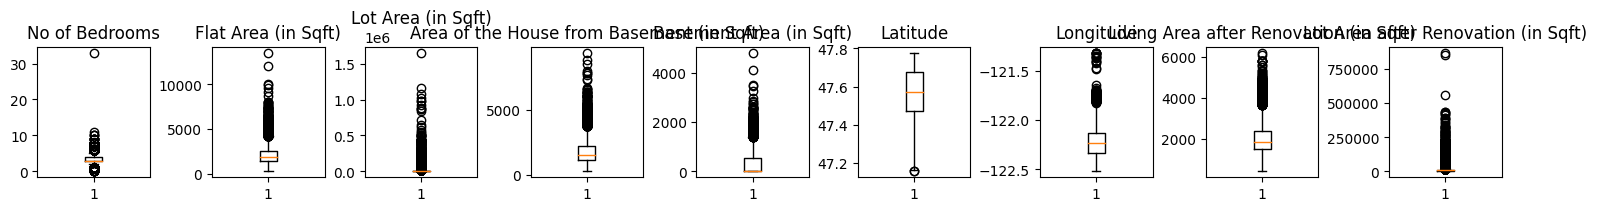

In [31]:
fig,ax=plt.subplots(1,9,figsize=(15,2),constrained_layout=True)

ax[0].boxplot(data['No of Bedrooms'])
ax[0].set_title('No of Bedrooms')

ax[1].boxplot(data['Flat Area (in Sqft)'])
ax[1].set_title('Flat Area (in Sqft)')

ax[2].boxplot(data['Lot Area (in Sqft)'])
ax[2].set_title('Lot Area (in Sqft)')

ax[3].boxplot(data['Area of the House from Basement (in Sqft)'])
ax[3].set_title('Area of the House from Basement (in Sqft)')

ax[4].boxplot(data['Basement Area (in Sqft)'])
ax[4].set_title('Basement Area (in Sqft)')

ax[5].boxplot(data['Latitude'])
ax[5].set_title('Latitude')

ax[6].boxplot(data['Longitude'])
ax[6].set_title('Longitude')

ax[7].boxplot(data['Living Area after Renovation (in Sqft)'])
ax[7].set_title('Living Area after Renovation (in Sqft)')

ax[8].boxplot(data['Lot Area after Renovation (in Sqft)'])
ax[8].set_title('Lot Area after Renovation (in Sqft)')

plt.show()

In [32]:
for col in data.select_dtypes(include=[np.number]).columns:
  Q1 = np.percentile(data[col],25)
  Q3 = np.percentile(data[col],75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



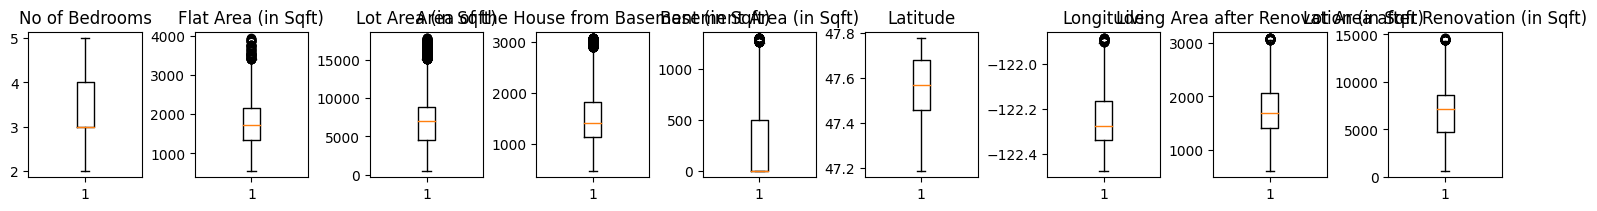

In [33]:
fig,ax=plt.subplots(1,9,figsize=(15,2),constrained_layout=True)

ax[0].boxplot(data['No of Bedrooms'])
ax[0].set_title('No of Bedrooms')

ax[1].boxplot(data['Flat Area (in Sqft)'])
ax[1].set_title('Flat Area (in Sqft)')

ax[2].boxplot(data['Lot Area (in Sqft)'])
ax[2].set_title('Lot Area (in Sqft)')

ax[3].boxplot(data['Area of the House from Basement (in Sqft)'])
ax[3].set_title('Area of the House from Basement (in Sqft)')

ax[4].boxplot(data['Basement Area (in Sqft)'])
ax[4].set_title('Basement Area (in Sqft)')

ax[5].boxplot(data['Latitude'])
ax[5].set_title('Latitude')

ax[6].boxplot(data['Longitude'])
ax[6].set_title('Longitude')

ax[7].boxplot(data['Living Area after Renovation (in Sqft)'])
ax[7].set_title('Living Area after Renovation (in Sqft)')

ax[8].boxplot(data['Lot Area after Renovation (in Sqft)'])
ax[8].set_title('Lot Area after Renovation (in Sqft)')

plt.show()

In [34]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Okay', 'Bad'], dtype=object)

In [35]:
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
data['Waterfront View'].value_counts()

Waterfront View
No     14848
Yes       14
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
categorical_cols = ['Waterfront View','Condition of the House']
numerical_cols = ['Sale Price','No of Bedrooms','Flat Area (in Sqft)','Age of House (in Years)']
data_encoded = pd.get_dummies(data, columns=categorical_cols,dtype=int,drop_first=True)
data_encoded.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
2,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0
6,2017-06-14,257500.0,3,2.25,1715.0,6819.0,2.0,7,1715.0,0,...,98003.0,47.3097,-122.327,2238.0,6819,0,0,1,0,0


In [38]:
data_encoded.shape

(14862, 22)

In [39]:
data_std_scaled = data_encoded.copy()
std_scaler = StandardScaler()
data_std_scaled[numerical_cols] = std_scaler.fit_transform(data_std_scaled[numerical_cols])
data_std_scaled.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,2017-10-14,-1.199781,-0.305653,1.00,-1.045394,5650.0,1.0,7,1180.0,0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
2,2016-02-15,-1.430917,-1.610250,1.00,-1.767840,10000.0,1.0,6,770.0,0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2017-12-14,0.908026,0.998945,3.00,0.329013,5000.0,1.0,7,1050.0,910,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,2016-02-15,0.389487,-0.305653,2.00,-0.164364,8080.0,1.0,8,1680.0,0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0
6,2017-06-14,-1.003398,-0.305653,2.25,-0.102692,6819.0,2.0,7,1715.0,0,...,98003.0,47.3097,-122.327,2238.0,6819,0,0,1,0,0


In [40]:
data_minmax_scaled = data_encoded.copy()

minmax_scaler = MinMaxScaler()
data_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(data_minmax_scaled[numerical_cols])
data_minmax_scaled.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,2017-10-14,0.134778,0.333333,1.00,0.183976,5650.0,1.0,7,1180.0,0,...,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0
2,2016-02-15,0.094412,0.000000,1.00,0.062315,10000.0,1.0,6,770.0,0,...,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0
3,2017-12-14,0.502890,0.666667,3.00,0.415430,5000.0,1.0,7,1050.0,910,...,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0
4,2016-02-15,0.412331,0.333333,2.00,0.332344,8080.0,1.0,8,1680.0,0,...,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0
6,2017-06-14,0.169075,0.333333,2.25,0.342730,6819.0,2.0,7,1715.0,0,...,98003.0,47.3097,-122.327,2238.0,6819,0,0,1,0,0


In [41]:
data_minmax_scaled.describe()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
count,14862,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,...,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000,14862.000000
mean,2017-03-03 16:54:27.178038272,0.344311,0.411430,1.952008,0.360024,6842.814561,1.450814,7.352846,1528.214036,245.369802,...,98083.061095,47.560370,-122.242806,1766.375050,6732.674741,0.000942,0.085655,0.633831,0.273045,0.006796
min,2016-01-15 00:00:00,0.000000,0.000000,0.500000,0.000000,520.000000,1.000000,6.000000,480.000000,0.000000,...,98001.000000,47.189500,-122.475000,620.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-15 00:00:00,0.210019,0.333333,1.500000,0.231454,4600.000000,1.000000,7.000000,1130.000000,0.000000,...,98033.000000,47.460850,-122.340000,1420.000000,4732.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017-06-14 00:00:00,0.311175,0.333333,2.000000,0.344214,6983.500000,1.000000,7.000000,1410.000000,0.000000,...,98092.000000,47.572000,-122.278000,1700.000000,7102.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2017-09-14 00:00:00,0.450866,0.666667,2.500000,0.474777,8800.000000,2.000000,8.000000,1830.000000,500.000000,...,98122.000000,47.683300,-122.166000,2070.000000,8580.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2017-12-14 00:00:00,1.000000,1.000000,4.000000,1.000000,17859.000000,3.500000,9.000000,3070.000000,1300.000000,...,98199.000000,47.777600,-121.886000,3080.000000,14600.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.174648,0.255515,0.647130,0.168408,3196.060140,0.548689,0.784226,533.372112,356.875128,...,54.465731,0.141778,0.115551,463.164155,2823.843539,0.030679,0.279863,0.481773,0.445539,0.082159


In [42]:
corr_cols = ['Sale Price','No of Bedrooms','Flat Area (in Sqft)','Age of House (in Years)']
data_corr = data_encoded[corr_cols].corr()
data_corr.head()

,Sale Price,No of Bedrooms,Flat Area (in Sqft),Age of House (in Years)
Sale Price,1.000000,0.199365,0.485341,0.080690
No of Bedrooms,0.199365,1.000000,0.600657,-0.130088
Flat Area (in Sqft),0.485341,0.600657,1.000000,-0.291786
Age of House (in Years),0.080690,-0.130088,-0.291786,1.000000


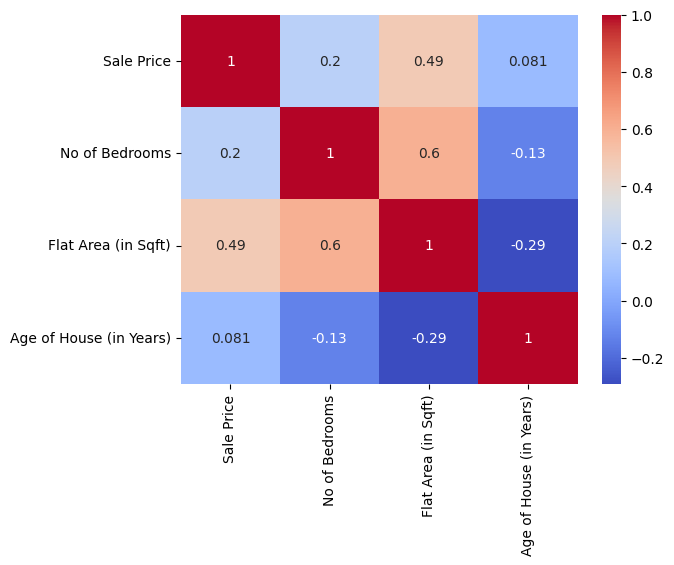

In [43]:
sns.heatmap(data_corr,annot=True,cmap='coolwarm')
plt.show()